In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from pyclustering.cluster.kmedoids import kmedoids

In [4]:
df = pd.read_csv("Kmeans_Kmedoids_and_hierarchical_Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
#preprocessing steps for clustering - 
#1. normalize the numeric data values
#2. encode the categorical data

In [12]:
df["CustomerID"].nunique()

200

In [14]:
df.drop("CustomerID", axis = 1, inplace = True)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoding = {}
for col in df.select_dtypes(include = ["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoding[col] = le
    


In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [18]:
#scaling - 
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
numerical_col = df.select_dtypes(include = ["int64", "float64"]).columns
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


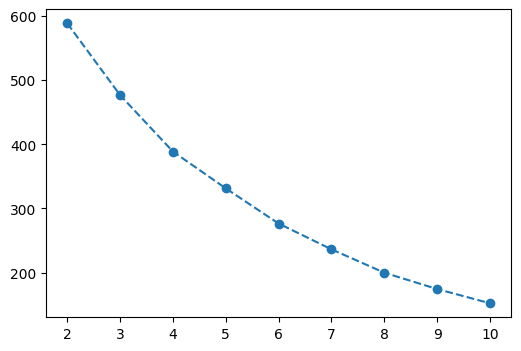

In [22]:
#kmeans clustering - 
inertia = []
k_range = range(2,11)
for i in k_range:
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (6,4))
plt.plot(k_range,inertia, marker = "o", linestyle = "--")
plt.show()


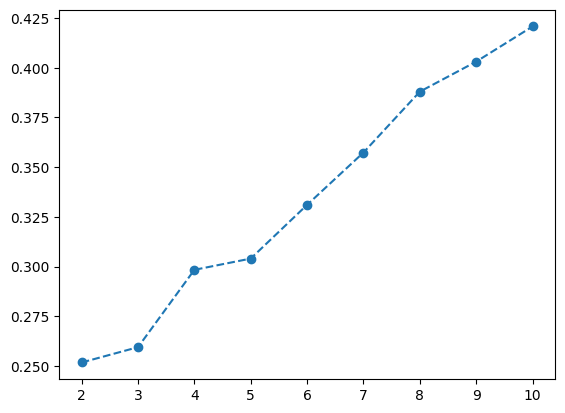

In [23]:
#analysing the silhoutee score of kmeans - 
optimal_k = 4
silhoutee = []
k_range = range(2,11)
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10)
    kmeans.fit(df)
    silhoutee.append(silhouette_score(df, kmeans.labels_))
    
plt.plot(k_range, silhoutee, marker = "o", linestyle = "--")
plt.show()

In [24]:
#silhoutee score for optimal k - 
kmeans = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 10)
df["kmeans_clusters"] = kmeans.fit_predict(df)

silhoutee_kmeans = silhouette_score(df, df["kmeans_clusters"])
print(silhoutee_kmeans)

0.4322104050107364


In [26]:
#kmedoids clustering - 
#steps - convert the initial df into numpy array -
x = df.values

k = 4
np.random.seed(42)

#select random medoids centers - 
medoids_random = np.random.choice(len(x), k, replace = False).tolist()

#run the kmedoid class - 
kmedoid_instance = kmedoids(x, medoids_random, itermax = 50, tolerance = 0.001)
kmedoid_instance.process()

In [27]:
#now derive insights from the kmedoids - 
clusters = kmedoid_instance.get_clusters()
medoids = kmedoid_instance.get_medoids()

cluster_lables = np.zeros(len(x), dtype = int)
for i, cluster in enumerate(clusters):
    cluster_lables[cluster] = i

In [28]:
df["kmedoids_clusters"] = cluster_lables

sil_score = silhouette_score(x, df["kmedoids_clusters"])
print(sil_score)

0.4322104050107364


In [29]:
#hireachial clustering - 
from sklearn.cluster import AgglomerativeClustering

In [30]:
hireachial = AgglomerativeClustering(n_clusters = 4)
df["hireachial"] = hireachial.fit_predict(df)
sil_score = silhouette_score(df, df["hireachial"])
print(sil_score)

0.5644310662324089
